# Ponderation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Dataframe
dataset =pd.read_csv('trans_cleaned_df.csv')


In [3]:
#faire une copie 
df = dataset.copy()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Features and target
x = df.drop('isFraud', axis=1)
y = df['isFraud']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Define class weights
class_weights = {0: 1, 1: 10}  # Adjust the weights as needed

# Create and train the model with class weights
model = RandomForestClassifier(class_weight=class_weights, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)

# KNeighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)

# Calculate metrics for RandomForestClassifier
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred)

# Calculate metrics for DecisionTreeClassifier
accuracy_dt = accuracy_score(y_test, y_dt_pred)
precision_dt = precision_score(y_test, y_dt_pred)
recall_dt = recall_score(y_test, y_dt_pred)
roc_auc_dt = roc_auc_score(y_test, y_dt_pred)

# Calculate metrics for KNeighborsClassifier
accuracy_knn = accuracy_score(y_test, y_knn_pred)
precision_knn = precision_score(y_test, y_knn_pred)
recall_knn = recall_score(y_test, y_knn_pred)
roc_auc_knn = roc_auc_score(y_test, y_knn_pred)

# Print metrics for RandomForestClassifier
print("RandomForestClassifier Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("ROC AUC:", roc_auc_rf)
print("=" * 30)

# Print metrics for DecisionTreeClassifier
print("DecisionTreeClassifier Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("ROC AUC:", roc_auc_dt)
print("=" * 30)

# Print metrics for KNeighborsClassifier
print("KNeighborsClassifier Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("ROC AUC:", roc_auc_knn)
print("=" * 30)


RandomForestClassifier Metrics:
Accuracy: 0.9861582554118099
Precision: 0.125
Recall: 0.0011648223645894002
ROC AUC: 0.5005255906944502
DecisionTreeClassifier Metrics:
Accuracy: 0.9722044319200718
Precision: 0.058379466532461
Recall: 0.0675596971461852
ROC AUC: 0.5261861962333061
KNeighborsClassifier Metrics:
Accuracy: 0.9861342385039068
Precision: 0.10526315789473684
Recall: 0.0011648223645894002
ROC AUC: 0.5005134148756265


In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
# Build models with hyperparameters sets
def DT_pred(x, y):
    RSC = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions={'criterion': ['gini', 'entropy'],
           'max_depth': range(1, 100, 10),
         'max_features': ['auto', 'sqrt', 'log2']},
    cv=3, scoring='roc_auc', n_jobs=-1, verbose = True)
    # Fit RandomizedSearchCV to find best hyperparameters

    search_result = RSC.fit(x, y)
    # Build models with optimized hyperparameters
    model_DT = DecisionTreeClassifier(
    criterion=search_result.best_params_["criterion"],
    max_depth=search_result.best_params_["max_depth"],
    max_features=search_result.best_params_["max_features"])

    # Split dataset into 3 consecutive folds
    kf = KFold(n_splits=3, shuffle=True, random_state=None)
    i = 1
    for train, test in kf.split(x):  
      
        X_train = x.iloc[train]
        y_train = y.iloc[train]
        X_test = x.iloc[test]
        y_test = y.iloc[test]

        model_DT.fit(X_train, y_train)
        train_pred = model_DT.predict(X_train)
        y_pred = model_DT.predict(X_test)
        train_accuracy = accuracy_score(y_train, train_pred)
        train_precision = precision_score(y_train, train_pred)
        train_recall = recall_score(y_train, train_pred)
        train_auc = roc_auc_score(y_train, train_pred)
        test_accuracy = accuracy_score(y_test, y_pred)
        test_precision = precision_score(y_test, y_pred)
        test_recall = recall_score(y_test, y_pred)
        test_auc = roc_auc_score(y_test, y_pred)        
        print('Fold '+ str(i), ':  Training accuracy: ', train_accuracy, 'Testing accuracy: ', test_accuracy)
        print('Fold '+ str(i), ':  Training precision: ', train_precision, 'Testing precision: ', test_precision)
        print('Fold '+ str(i), ':  Training recall: ', train_recall, 'Testing accuracy: ', test_recall)
        print('Fold '+ str(i), ':  Training auc: ', train_auc, 'Testing auc: ', test_auc)
        # Calculer la matrice de confusion pour les prédictions de test
        test_confusion_matrix = confusion_matrix(y_test, y_pred)

        # Afficher la matrice de confusion avec Seaborn
        plt.figure(figsize=(8, 6))
        sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix for Testing pour le Fold {i}')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fold 1 :  Training accuracy:  0.9916852799193026 Testing accuracy:  0.9802100045151931
Fold 1 :  Training precision:  0.9895484949832776 Testing precision:  0.05958132045088567
Fold 1 :  Training recall:  0.4078221915920055 Testing accuracy:  0.024454725710508923
Fold 1 :  Training auc:  0.7038806500211455 Testing auc:  0.5093808040718659


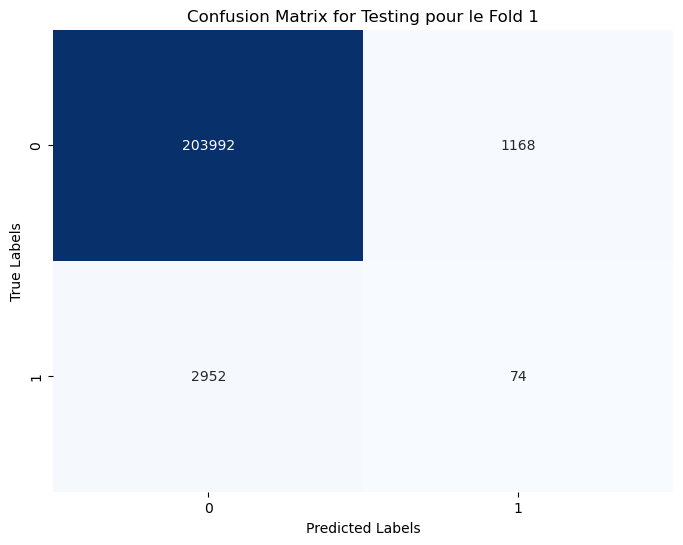

Fold 1 :  Training accuracy:  0.9916708896633051 Testing accuracy:  0.9804596872973557
Fold 1 :  Training precision:  0.9918962722852512 Testing precision:  0.0464
Fold 1 :  Training recall:  0.4151967435549525 Testing accuracy:  0.019768234492160874
Fold 1 :  Training auc:  0.7075740097578649 Testing auc:  0.5069803555104494


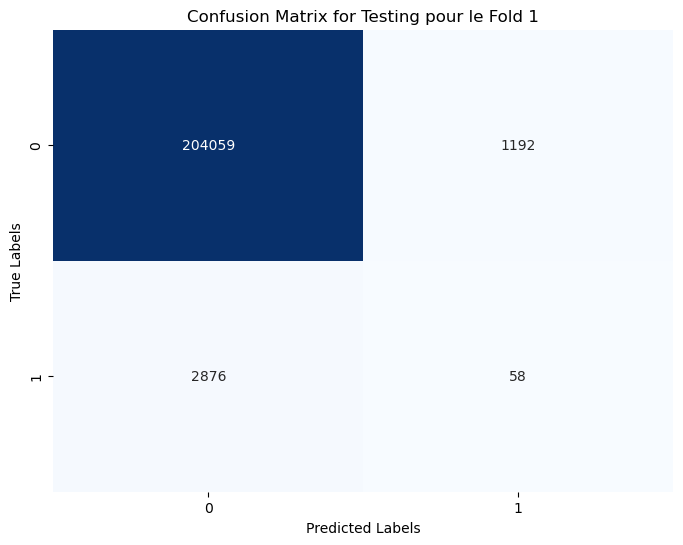

Fold 1 :  Training accuracy:  0.9916756930718037 Testing accuracy:  0.9804404736172154
Fold 1 :  Training precision:  0.9882537196554424 Testing precision:  0.0426179604261796
Fold 1 :  Training recall:  0.42348993288590603 Testing accuracy:  0.01951219512195122
Fold 1 :  Training auc:  0.7117084177149706 Testing auc:  0.5066925123382691


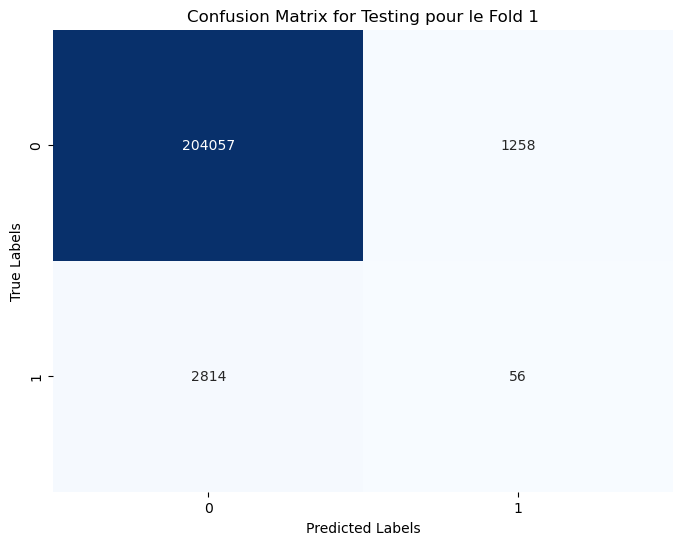

In [12]:
DT_pred(x, y)